<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 
6. Image augmentation of random rotation between -7 to +7 degrees

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3.  StepLR with step size 6 and gamma value 0.1. 

Target: 
======

In this step

1. User a lesser value for drop out and see if that helps to improve the validation accuracy 
3. Target is to achieve over 99.4% validation accuracy with same number of parameters
4. Run it for less than 15 epochs to study how the accuracy changes with Image Augmentation technique

Result: 
======
1. Observed Train accuracy: 98.68%
2. Validation accuracy:99.4%
3. Number of parameters: 8,582


Analysis: 
========

1. As expected validation accuracy increased to 99.4% from the last step in which the accuracy dropped to 99.25%
2. Even though the accuracy hit the target of 99.4% but it happended in only one step. At the same time the accuracy jumped a lot and didn't stabilize from lower epoch to higher epoch 
3. This model needs further improvement as it doesn't seems to be a very smooth model

In [2]:
from model import model6 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 14, 28, 28]             126
              ReLU-2           [-1, 14, 28, 28]               0
       BatchNorm2d-3           [-1, 14, 28, 28]              28
         Dropout2d-4           [-1, 14, 28, 28]               0
            Conv2d-5           [-1, 14, 28, 28]           1,764
              ReLU-6           [-1, 14, 28, 28]               0
       BatchNorm2d-7           [-1, 14, 28, 28]              28
         Dropout2d-8           [-1, 14, 28, 28]               0
         MaxPool2d-9           [-1, 14, 14, 14]               0
           Conv2d-10           [-1, 14, 14, 14]           1,764
             ReLU-11           [-1, 14, 14, 14]               0
      BatchNorm2d-12           [-1, 14, 14, 14]              28
        Dropout2d-13           [-1, 14, 14, 14]               0
           Conv2d-14           [-1, 14,

G:\TSAI-ERA\Session 7\model.py:355: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader_rotation, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128
rotation_range = (-7.0, 7.0)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader_rotation(batch_size, rotation_range, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [11]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.069).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


  0%|                                                                                          | 0/469 [00:00<?, ?it/s]G:\TSAI-ERA\Session 7\model.py:355: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=0.041450876742601395 Batch_id=468 Accuracy=89.83: 100%|█████████████████████████| 469/469 [01:11<00:00,  6.58it/s]



Test set: Average loss: 0.0561, Accuracy: 9829/10000 (98.29%)

Currently Executing Epoch: 2


Loss=0.08761990070343018 Batch_id=468 Accuracy=97.08: 100%|██████████████████████████| 469/469 [01:14<00:00,  6.32it/s]



Test set: Average loss: 0.0424, Accuracy: 9855/10000 (98.55%)

Currently Executing Epoch: 3


Loss=0.11525112390518188 Batch_id=468 Accuracy=97.57: 100%|██████████████████████████| 469/469 [01:13<00:00,  6.37it/s]



Test set: Average loss: 0.0319, Accuracy: 9902/10000 (99.02%)

Currently Executing Epoch: 4


Loss=0.05220694839954376 Batch_id=468 Accuracy=97.92: 100%|██████████████████████████| 469/469 [01:13<00:00,  6.34it/s]



Test set: Average loss: 0.0289, Accuracy: 9896/10000 (98.96%)

Currently Executing Epoch: 5


Loss=0.06493036448955536 Batch_id=468 Accuracy=98.13: 100%|██████████████████████████| 469/469 [01:14<00:00,  6.30it/s]



Test set: Average loss: 0.0257, Accuracy: 9915/10000 (99.15%)

Currently Executing Epoch: 6


Loss=0.020100684836506844 Batch_id=468 Accuracy=98.34: 100%|█████████████████████████| 469/469 [01:15<00:00,  6.18it/s]



Test set: Average loss: 0.0237, Accuracy: 9928/10000 (99.28%)

Currently Executing Epoch: 7


Loss=0.03824958577752113 Batch_id=468 Accuracy=98.53: 100%|██████████████████████████| 469/469 [01:13<00:00,  6.35it/s]



Test set: Average loss: 0.0210, Accuracy: 9940/10000 (99.40%)

Currently Executing Epoch: 8


Loss=0.014454036951065063 Batch_id=468 Accuracy=98.60: 100%|█████████████████████████| 469/469 [01:13<00:00,  6.38it/s]



Test set: Average loss: 0.0205, Accuracy: 9934/10000 (99.34%)

Currently Executing Epoch: 9


Loss=0.03834662586450577 Batch_id=468 Accuracy=98.62: 100%|██████████████████████████| 469/469 [01:13<00:00,  6.38it/s]



Test set: Average loss: 0.0203, Accuracy: 9935/10000 (99.35%)

Currently Executing Epoch: 10


Loss=0.05470803752541542 Batch_id=468 Accuracy=98.66: 100%|██████████████████████████| 469/469 [01:16<00:00,  6.14it/s]



Test set: Average loss: 0.0198, Accuracy: 9938/10000 (99.38%)

Currently Executing Epoch: 11


Loss=0.09464245289564133 Batch_id=468 Accuracy=98.65: 100%|██████████████████████████| 469/469 [01:14<00:00,  6.33it/s]



Test set: Average loss: 0.0191, Accuracy: 9935/10000 (99.35%)

Currently Executing Epoch: 12


Loss=0.017020566388964653 Batch_id=468 Accuracy=98.65: 100%|█████████████████████████| 469/469 [01:14<00:00,  6.29it/s]



Test set: Average loss: 0.0198, Accuracy: 9931/10000 (99.31%)

Currently Executing Epoch: 13


Loss=0.03094625659286976 Batch_id=468 Accuracy=98.67: 100%|██████████████████████████| 469/469 [01:15<00:00,  6.23it/s]



Test set: Average loss: 0.0197, Accuracy: 9932/10000 (99.32%)

Currently Executing Epoch: 14


Loss=0.04602913185954094 Batch_id=468 Accuracy=98.68: 100%|██████████████████████████| 469/469 [01:16<00:00,  6.15it/s]



Test set: Average loss: 0.0197, Accuracy: 9930/10000 (99.30%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

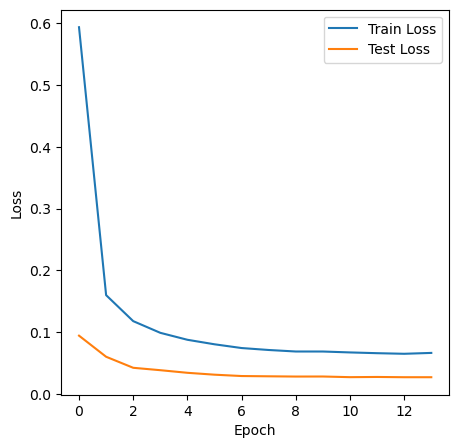

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

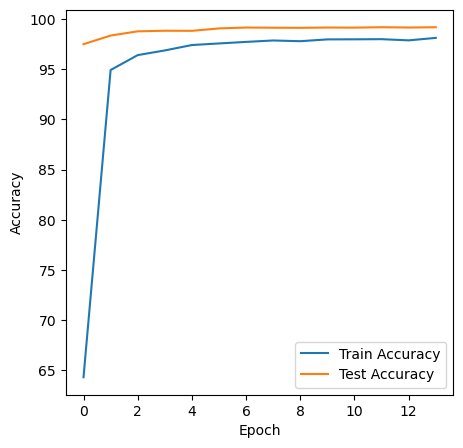

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
